In [1]:
#Titre 

Feature Information:

Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

Age: Positive Integer variable of the reviewers age.

Title: String variable for the title of the review.

Review Text: String variable for the review body.

Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

Division Name: Categorical name of the product high level division.

Department Name: Categorical name of the product department name.

Class Name: Categorical name of the product class name.

In [2]:
#Import

import pickle
import pandas as pd
import numpy as np

In [3]:
#Récuperation du dataframe train 
df_raw = pd.read_csv(r"C:\Users\Simplon\Desktop\Travaux python\Texte analyze\Sentiment analyses\women clothing reviews\Womens Clothing E-Commerce Reviews.csv")
df_raw

Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 11 columns]

# 1. Exploratory Data Analysis

In [4]:
# !pip install pyforest
# 1-Import Libraies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
#import missingno as msno 
from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# Importing plotly and cufflinks in offline mode
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# !pip install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored
import ipywidgets
from ipywidgets import interact

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud 

In [5]:
#!pip install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored
import ipywidgets
from ipywidgets import interact

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud 

In [6]:
df = df_raw.copy()

In [7]:
df.shape

(23486, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [9]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [10]:
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                                                                                                                                                                               Review Text  \
0                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Rating  Recommended IND  Positive Feedback Count   Division Name  \
0       4                1                        0       Initmates   
1       5                1                        4         General   
2       3                0                        0         General   
3       5                1                        0  General Petite   
4       5                1                        6         General   

  Department Name Class Name  
0        Intimate  Intimates  
1         Dresses    Dresses  
2         Dresses    Dresses  
3         Bottoms      Pants  
4            Tops    Blouses

In [11]:
df["Clothing ID"].value_counts()

1078    1024
862      806
1094     756
1081     582
872      545
        ... 
775        1
791        1
887        1
1127       1
1199       1
Name: Clothing ID, Length: 1206, dtype: int64

In [12]:
df.drop(['Unnamed: 0', 'Clothing ID'], axis = 1, inplace=True)

In [13]:
df.shape

(23486, 9)

In [14]:
df_raw.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [15]:
df = df.rename(columns = {'Review Text' : 'text', 'Recommended IND' : 'recommended', 
                          'Positive Feedback Count' : 'feedback_count', 'Division Name' : 'division', 
                          'Department Name' : 'department', 'Class Name' :'class'})

In [16]:
df.describe().T

count   mean    std    min    25%    50%    75%     max
Age            23486.000 43.199 12.280 18.000 34.000 41.000 52.000  99.000
Rating         23486.000  4.196  1.110  1.000  4.000  5.000  5.000   5.000
recommended    23486.000  0.822  0.382  0.000  1.000  1.000  1.000   1.000
feedback_count 23486.000  2.536  5.702  0.000  0.000  1.000  3.000 122.000

In [17]:
df.describe(include=object).T

count unique  \
Title       19676  13993   
text        22641  22634   
division    23472      3   
department  23472      6   
class       23472     20   

                                                                                           top  \
Title                                                                                 Love it!   
text        Perfect fit and i've gotten so many compliments. i buy all my suits from here now!   
division                                                                               General   
department                                                                                Tops   
class                                                                                  Dresses   

             freq  
Title         136  
text            3  
division    13850  
department  10468  
class        6319

<AxesSubplot:>

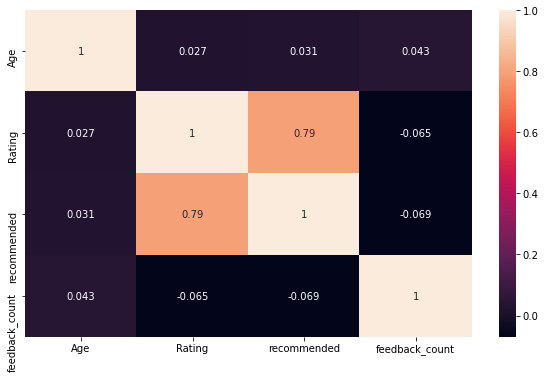

In [18]:
sns.heatmap(df.corr(), annot=True)

In [19]:
# Correlation entre Rating et Recommanded IND

In [20]:
df_raw.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [21]:
df.columns

Index(['Age', 'Title', 'text', 'Rating', 'recommended', 'feedback_count',
       'division', 'department', 'class'],
      dtype='object')

In [22]:
#Age

In [23]:
px.histogram(df, x = df.Age)

In [24]:
pip install cufflinks --upgrade

Note: you may need to restart the kernel to use updated packages.


In [25]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [26]:
pd.crosstab(df.Age, df.recommended).iplot(kind="bar")

In [27]:
#Rating 

In [28]:
px.histogram(df, x = df.Rating)

In [29]:
pd.crosstab(df.Rating, df.recommended).iplot(kind="bar")

In [30]:
#recommended

In [31]:
df["recommended"].value_counts()

1    19314
0     4172
Name: recommended, dtype: int64

In [32]:
px.histogram(df, x = df.recommended)

In [33]:
#feedback_count:

In [34]:
df["feedback_count"].unique()

array([  0,   4,   6,   1,  14,   2,   3,   7,   5,   9,  34,  10,  17,
        11,  24,  12,   8,  13,  20,  16,  23,  15,  19,  29,  32,  30,
        55,  84,  27,  43,  21,  42,  37,  71,  35,  65, 117,  33,  18,
        25,  47,  22,  51,  94,  31,  77,  61,  46,  26,  28,  36,  57,
        45,  66,  82,  44,  81,  58,  78,  38,  49,  52, 122,  41, 108,
        54,  40,  53,  87,  64,  89,  68,  56,  98,  95,  39,  93,  48,
        99,  50,  69,  59], dtype=int64)

In [35]:
df["feedback_count"].head()

0    0
1    4
2    0
3    0
4    6
Name: feedback_count, dtype: int64

In [36]:
df["feedback_count"].value_counts()

0      11176
1       4043
2       2193
3       1433
4        922
5        673
6        525
7        374
8        319
9        261
10       225
11       178
12       146
14       121
13       102
15        94
17        81
16        74
18        62
19        54
20        40
23        31
21        30
22        29
25        25
28        24
26        23
24        21
27        20
30        18
31        17
29        15
32        10
42         9
37         9
38         8
34         7
36         6
35         6
33         6
51         5
43         4
45         4
39         4
81         4
65         4
44         3
40         3
47         3
41         3
57         3
46         2
49         2
58         2
53         2
55         2
66         1
78         1
94         1
64         1
48         1
93         1
77         1
61         1
50         1
87         1
98         1
108        1
82         1
71         1
59         1
99         1
52         1
68         1
122        1
84         1
69         1

In [37]:
px.histogram(df, x = df.feedback_count)

In [38]:
pd.crosstab(df.feedback_count, df.recommended).iplot(kind="bar")

In [39]:
#Division name 

In [40]:
px.histogram(df, x = df.division)

In [41]:
pd.crosstab(df.division, df.recommended).iplot(kind="bar")

In [42]:
#Departement

In [43]:
px.histogram(df, x = df.department)

In [44]:
pd.crosstab(df.department, df.recommended).iplot(kind="bar")

In [45]:
#Class

In [46]:
df["class"].describe().T

count       23472
unique         20
top       Dresses
freq         6319
Name: class, dtype: object

In [47]:
px.histogram(df, x = df["class"])

In [48]:
pd.crosstab(df["class"], df.recommended).iplot(kind="bar")

In [49]:
#Title

In [50]:
df.Title.describe().T

count        19676
unique       13993
top       Love it!
freq           136
Name: Title, dtype: object

In [51]:
#Check Proportion of Target Class Variable

1    19314
0     4172
Name: recommended, dtype: int64


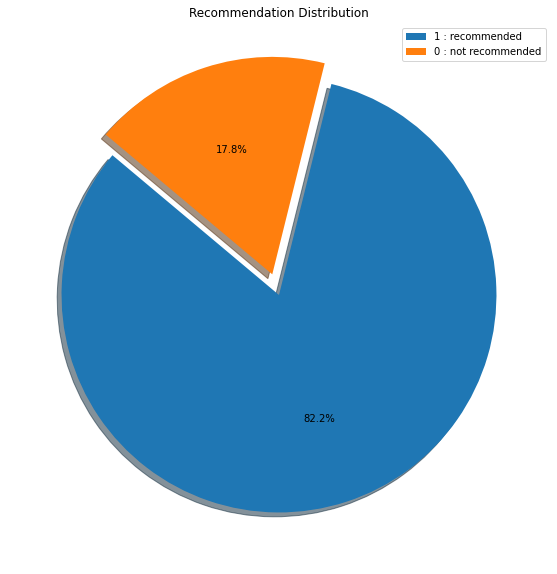

In [52]:
# recommended : 
# Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

print(df.recommended.value_counts())

plt.figure(figsize=(10,10))

explode = [0,0.1]
plt.pie(df.recommended.value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['1 : recommended','0 : not recommended'])
plt.title('Recommendation Distribution')
plt.axis('off');

# 2. Feature Selection and Data Cleaning

In [53]:
#From now on, the DataFrame we will work with should contain two columns: "Review Text" and "Recommended IND". 
#We can do the missing value detection operations from now on. We can also rename the column names if we want.

In [54]:
df_ml = df.copy()

In [55]:
df_ml.columns

Index(['Age', 'Title', 'text', 'Rating', 'recommended', 'feedback_count',
       'division', 'department', 'class'],
      dtype='object')

In [56]:
drop_columns = ['Age', 
                'Title', 
                'Rating',
                'feedback_count', 
                'division',
                'department',
                'class']

In [57]:
df_ml.drop(drop_columns, axis = 1, inplace = True)

In [58]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         22641 non-null  object
 1   recommended  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


## Missing Values 

In [59]:
df_ml.isnull().sum()

text           845
recommended      0
dtype: int64

In [60]:
df_ml.isnull().melt(value_name="missing")

variable  missing
0             text    False
1             text    False
2             text    False
3             text    False
4             text    False
...            ...      ...
46967  recommended    False
46968  recommended    False
46969  recommended    False
46970  recommended    False
46971  recommended    False

[46972 rows x 2 columns]

<Figure size 720x360 with 0 Axes>

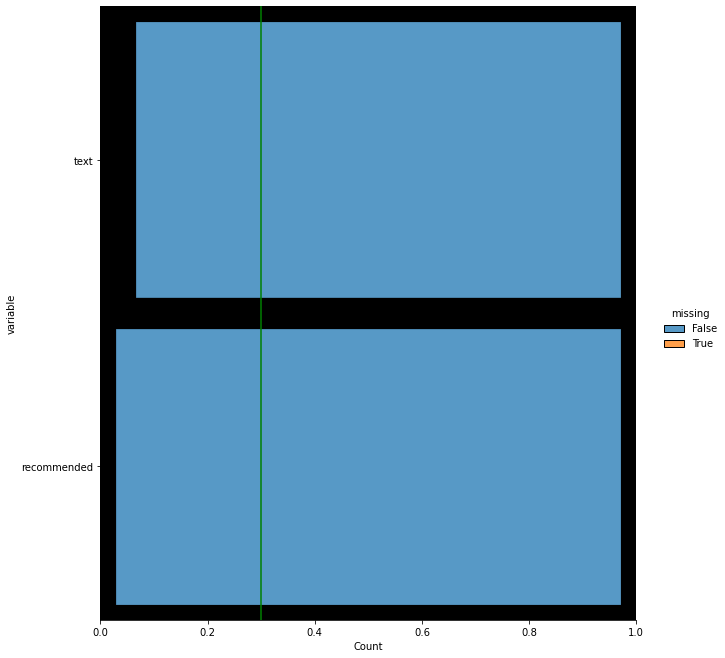

In [61]:
plt.figure(figsize = (10, 5))

sns.displot(
    data = df_ml.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 9.25)

plt.axvline(0.3, color = "g");

In [62]:
#https://www.kaggle.com/kadirduran/nlp-sentiment-classification-with-ml-and-dl-models/notebook

In [63]:
df_ml= df_ml.dropna()

In [64]:
df_ml.isnull().sum()

text           0
recommended    0
dtype: int64

In [65]:
df_ml.rename(columns = {'review_text':'text', 'recommended':'recommend'}, inplace = True)

In [66]:
df_ml.columns

Index(['text', 'recommend'], dtype='object')

# 3. Text Mining

## Tokenization, Noise Removal, Lexicon Normalization

As the first step change text to tokens and convertion all of the words to lower case. Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.

In [67]:
df_ml.head()

text  \
0                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   recommend  
0          1  
1          1  
2          0  
3          1  
4          1

In [68]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Simplon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [70]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Simplon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [71]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Simplon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [72]:
# import nltk
# nltk.download()

In [73]:
stop_words = stopwords.words('english')

In [74]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower()) 
        
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
        
    #joining
    return " ".join(text_cleaned)

In [75]:
df_ml["text"] = df_ml["text"].apply(cleaning)
df_ml["text"].head()

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                       love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom ha...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                             shirt flattering due adjustable front tie perfect length wear legging sleeveless pair 

In [76]:
df_ml

text  \
0                                                                                                                                                                  absolutely wonderful silky sexy comfortable   
1                         love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite   
2      high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom ha...   
3                                                                                                                     love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment   
4                                                                                               shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt   
...                                                                                                                                                                                                        ...   
23481                                                                                                                                        happy snag dress great price easy slip flattering cut color combo   
23482                                          reminds maternity clothes soft stretchy shiny material cut flattering drape nicely found one button close front looked awkward nice long sleeve maybe others ok   
23483                                                                                               fit well top see never would worked im glad able try store didnt order online different fabric would great   
23484  bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might worth side note dress de...   
23485                                                                                                                            dress lovely platinum feminine fit perfectly easy wear comfy highly recommend   

       recommend  
0              1  
1              1  
2              0  
3              1  
4              1  
...          ...  
23481          1  
23482          1  
23483          0  
23484          1  
23485          1  

[22641 rows x 2 columns]

### Rare Words

In [77]:
" ".join(df_ml["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 's

In [78]:
rare_words = pd.Series(" ".join(df_ml["text"]).split()).value_counts()
rare_words

dress          11352
fit            10128
size            9363
love            8992
top             8281
               ...  
o                  1
volumptuous        1
ext                1
korkease           1
unreal             1
Length: 11996, dtype: int64

In [79]:
rare_words = rare_words[rare_words <= 2] 

In [80]:
rare_words.index

Index(['streamline', 'owns', 'dive', 'elephant', 'demonstrates', 'pilly',
       'shifting', 'japanese', 'testing', 'dawn',
       ...
       'eq', 'carrier', 'prewashed', 'woodsy', 'pry', 'o', 'volumptuous',
       'ext', 'korkease', 'unreal'],
      dtype='object', length=6497)

In [81]:
df_ml["text"] = df_ml["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df_ml["text"].head()

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                       love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                             shirt flattering due adjustable front tie perfect length wear legging sleeveless pair 

## 4. WordCloud - Repetition of Words

We will create separate word clouds for positive and negative reviews. We can qualify a review as positive or negative, by looking at its recommended status.

We can follow the steps below:

Detect Reviews
Collect Words
Create Word Cloud

### Detect Reviews (positive and negative separately)

In [82]:
df_ml[df_ml["recommend"] == 0].head(3)

text  \
2   high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...   
5   love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening skirt would take away embellish...   
10       dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back   

    recommend  
2           0  
5           0  
10          0

In [83]:
df_ml[df_ml["recommend"] == 1].head(3)

text  \
0                                                                                                                                           absolutely wonderful silky sexy comfortable   
1  love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite   
3                                                                                              love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment   

   recommend  
0          1  
1          1  
3          1

Collect Words (positive and negative separately

In [84]:
" ".join(df_ml["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flatteri

In [85]:
positive_words =" ".join(df_ml[df_ml["recommend"] == 1].text).split()
positive_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'basket',
 'hte',
 'last',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'trying',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'size',
 'bummer',
 'petite',
 'decided',
 'though',
 'said',
 'everything',
 '

In [86]:
negative_words = " ".join(df_ml[df_ml["recommend"] == 0].text).split()
negative_words 

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typically',
 'fit',
 'tight',
 'material',

In [87]:
len(positive_words)

516816

In [88]:
len(negative_words)

116488

Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [89]:
review_text = df_ml["text"]

In [90]:
all_words = " ".join(review_text)

In [91]:
all_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

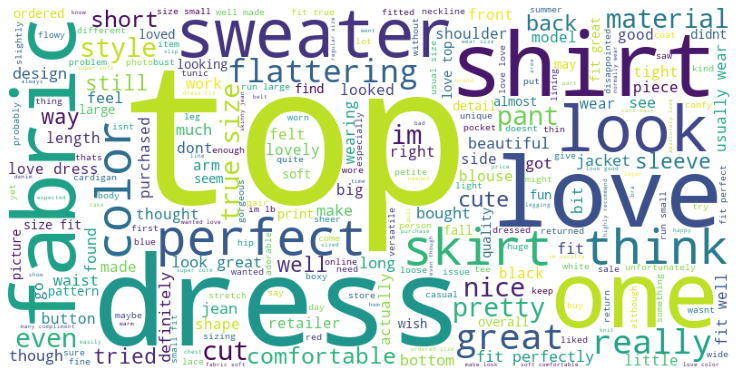

In [92]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(all_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

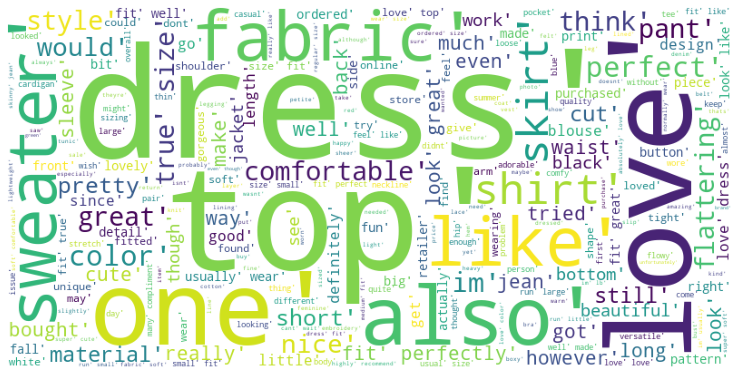

In [93]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(str(positive_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

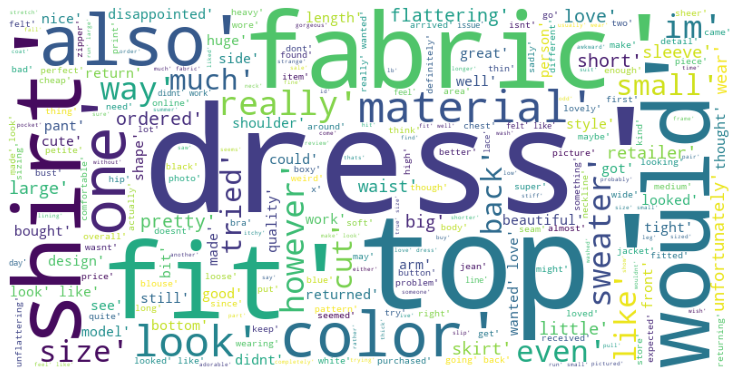

In [94]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(str(negative_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [95]:
#Counting words

In [96]:
counter_all = Counter(word_tokenize(all_words))
counter_all.most_common(50)

[('dress', 11352),
 ('fit', 10128),
 ('size', 9363),
 ('love', 8992),
 ('top', 8281),
 ('like', 7036),
 ('color', 6916),
 ('look', 6891),
 ('wear', 6521),
 ('great', 6101),
 ('im', 5968),
 ('would', 5014),
 ('fabric', 4862),
 ('small', 4589),
 ('really', 3924),
 ('ordered', 3835),
 ('little', 3773),
 ('perfect', 3760),
 ('one', 3704),
 ('flattering', 3485),
 ('soft', 3322),
 ('well', 3251),
 ('back', 3186),
 ('comfortable', 3047),
 ('cute', 3030),
 ('nice', 3017),
 ('bought', 2986),
 ('beautiful', 2950),
 ('bit', 2877),
 ('material', 2811),
 ('shirt', 2791),
 ('large', 2791),
 ('much', 2703),
 ('sweater', 2700),
 ('length', 2638),
 ('run', 2631),
 ('jean', 2600),
 ('also', 2583),
 ('work', 2527),
 ('petite', 2430),
 ('got', 2426),
 ('long', 2400),
 ('short', 2361),
 ('waist', 2306),
 ('quality', 2259),
 ('medium', 2233),
 ('skirt', 2220),
 ('think', 2194),
 ('pretty', 2188),
 ('even', 2166)]

## 5. Sentiment Classification with Machine Learning and Deep Learning

Vectorisation: we have our review text column as a token (which has no punctuations and stopwords). We can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. We can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X = df_ml["text"].values
y = df_ml["recommend"].values

In [99]:
df_ml

text  \
0                                                                                                                                                                  absolutely wonderful silky sexy comfortable   
1                         love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite   
2      high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...   
3                                                                                                                     love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment   
4                                                                                               shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt   
...                                                                                                                                                                                                        ...   
23481                                                                                                                                        happy snag dress great price easy slip flattering cut color combo   
23482                                          reminds maternity clothes soft stretchy shiny material cut flattering drape nicely found one button close front looked awkward nice long sleeve maybe others ok   
23483                                                                                               fit well top see never would worked im glad able try store didnt order online different fabric would great   
23484  bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might worth side note dress de...   
23485                                                                                                                                     dress lovely feminine fit perfectly easy wear comfy highly recommend   

       recommend  
0              1  
1              1  
2              0  
3              1  
4              1  
...          ...  
23481          1  
23482          1  
23483          0  
23484          1  
23485          1  

[22641 rows x 2 columns]

In [100]:
X

array(['absolutely wonderful silky sexy comfortable',
       'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
       'high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
       ...,
       'fit well top see never would worked im glad able try store didnt order online different fabric would great',
       'bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might worth side note dress delivered tag found much cheaper looking',
       'dress lovely feminine fit perfectly easy wear comfy highly recommend'],
     

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 101)

In [102]:
X_train.shape

(18112,)

In [103]:
#Count Vectorization

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

In [105]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [106]:
X_train_count

<18112x5469 sparse matrix of type '<class 'numpy.int64'>'
	with 459520 stored elements in Compressed Sparse Row format>

In [107]:
X_train_count.shape

(18112, 5469)

In [108]:
len(X_train_count.toarray())

18112

In [109]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [110]:
len(X_test_count.toarray())

4529

In [111]:
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [112]:
b = pd.DataFrame

In [113]:
#df.loc[df['Color'] == 'Green']

In [114]:
vectorizer.get_feature_names()

['aa',
 'ab',
 'abby',
 'abdomen',
 'ability',
 'able',
 'abo',
 'absolute',
 'absolutely',
 'absolutley',
 'abstract',
 'absurd',
 'abt',
 'abundance',
 'ac',
 'accent',
 'accented',
 'accentuate',
 'accentuated',
 'accentuates',
 'accentuating',
 'accept',
 'acceptable',
 'access',
 'accessorize',
 'accessorized',
 'accessorizing',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'accommodate',
 'accommodates',
 'accommodating',
 'accomodate',
 'according',
 'accordingly',
 'account',
 'accurate',
 'accurately',
 'achieve',
 'across',
 'acrylic',
 'act',
 'action',
 'active',
 'activewear',
 'activity',
 'actual',
 'actuality',
 'actually',
 'ad',
 'ada',
 'add',
 'added',
 'addicted',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'adequate',
 'adequately',
 'adjust',
 'adjustable',
 'adjusted',
 'adjusting',
 'adjustment',
 'admire',
 'admired',
 'admiring',
 'admit',
 'admittedly',
 'adn',
 'ador',
 'adorable',
 'adore',
 'adored',
 'adult',
 'adva

In [115]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

aa  ab  abby  abdomen  ability  able  abo  absolute  absolutely  \
0       0   0     0        0        0     0    0         0           0   
1       0   0     0        0        0     0    0         0           0   
2       0   0     0        0        0     0    0         0           0   
3       0   0     0        0        0     0    0         0           0   
4       0   0     0        0        0     0    0         0           0   
...    ..  ..   ...      ...      ...   ...  ...       ...         ...   
18107   0   0     0        0        0     0    0         0           0   
18108   0   0     0        0        0     0    0         0           0   
18109   0   0     0        0        0     0    0         0           0   
18110   0   0     0        0        0     0    0         0           0   
18111   0   0     0        0        0     0    0         0           0   

       absolutley  abstract  absurd  abt  abundance  ac  accent  accented  \
0               0         0       0    0          0   0       0         0   
1               0         0       0    0          0   0       0         0   
2               0         0       0    0          0   0       0         0   
3               0         0       0    0          0   0       0         0   
4               0         0       0    0          0   0       0         0   
...           ...       ...     ...  ...        ...  ..     ...       ...   
18107           0         0       0    0          0   0       0         0   
18108           0         0       0    0          0   0       0         0   
18109           0         0       0    0          0   0       0         0   
18110           0         0       0    0          0   0       0         0   
18111           0         0       0    0          0   0       0         0   

       accentuate  accentuated  accentuates  accentuating  accept  acceptable  \
0               0            0            0             0       0           0   
1               0            0            0             0       0           0   
2               0            0            0             0       0           0   
3               0            0            0             0       0           0   
4               0            0            0             0       0           0   
...           ...          ...          ...           ...     ...         ...   
18107           0            0            0             0       0           0   
18108           0            0            0             0       0           0   
18109           0            0            0             0       0           0   
18110           0            0            0             0       0           0   
18111           0            0            0             0       0           0   

       access  accessorize  accessorized  accessorizing  accessory  accident  \
0           0            0             0              0          0         0   
1           0            0             0              0          0         0   
2           0            0             0              0          0         0   
3           0            0             0              0          0         0   
4           0            0             0              0          0         0   
...       ...          ...           ...            ...        ...       ...   
18107       0            0             0              0          0         0   
18108       0            0             0              0          0         0   
18109       0            0             0              0          0         0   
18110       0            0             0              0          0         0   
18111       0            0             0              0          0         0   

       accidental  accidentally  accommodate  accommodates  accommodating  \
0               0             0            0             0              0   
1               0             0            0             0              0   
2               0           

In [116]:
X_train

array(['beautiful sweater soft lovely color easy wear current photo true length pound ordered regular sm fit hip',
       'surprised low review dress dress obviously loose fitting style bit man quality fabric beautiful pattern stunning find loose flowy style comfortable love boot tights winter also planning wear sandal spring purchased petite small',
       'bought blue love usually wear x small retailer shirt small medium dress ended extra small petite really flattering hide stomach enough highly recommend dress size way',
       ...,
       'sweater came expected adorable others said soft comfy wear everywhere including work love',
       'top flattering im medium build bulky fabric didnt fall right place made look round im definitely going back',
       'top totally adorable one favorite retailer top season wear jean even red skinny pant get ton compliment fit true size material washable durable'],
      dtype=object)

In [117]:
X_train

array(['beautiful sweater soft lovely color easy wear current photo true length pound ordered regular sm fit hip',
       'surprised low review dress dress obviously loose fitting style bit man quality fabric beautiful pattern stunning find loose flowy style comfortable love boot tights winter also planning wear sandal spring purchased petite small',
       'bought blue love usually wear x small retailer shirt small medium dress ended extra small petite really flattering hide stomach enough highly recommend dress size way',
       ...,
       'sweater came expected adorable others said soft comfy wear everywhere including work love',
       'top flattering im medium build bulky fabric didnt fall right place made look round im definitely going back',
       'top totally adorable one favorite retailer top season wear jean even red skinny pant get ton compliment fit true size material washable durable'],
      dtype=object)

In [118]:
#TF-IDF

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [120]:
tf_idf_vectorizer = TfidfVectorizer()

In [121]:
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)

In [122]:
with open('tf_idf_LR.pickle', 'wb') as handle:
    pickle.dump(tf_idf_vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [123]:
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [124]:
a = pd.DataFrame(tf_idf_vectorizer.vocabulary_, index=[0])

In [125]:
a

beautiful  sweater  soft  lovely  color  easy  wear  current  photo  true  \
0        375     4677  4331    2740    893  1480  5265     1136   3343  4968   

   length  pound  ordered  regular    sm   fit   hip  surprised   low  review  \
0    2625   3488     3170     3744  4284  1781  2223       4659  2743    3853   

   dress  obviously  loose  fitting  style  bit   man  quality  fabric  \
0   1427       3117   2718     1783   4590  443  2797     3624    1674   

   pattern  stunning  find  flowy  comfortable  love  boot  tights  winter  \
0     3284      4586  1763   1849          917  2737   508    4865    5350   

   also  planning  sandal  spring  purchased  petite  small  bought  blue  \
0   132      3402    3969    4430       3605    3337   4286     527   478   

   usually  retailer  shirt  medium  ended  extra  really  flattering  hide  \
0     5142      3835   4140    2855   1547   1660    3689        1808  2208   

   stomach  enough  highly  recommend  size   way   run  large  arm  hole  \
0     4519    1559    2217       3708  4222  5260  3934   2563  223  2235   

   unflattering  chest  seemed  make  belly  protrude  kind  made  look  \
0          5078    784    4051  2791    401      3575  2521  2767  2710   

   pregnant  could   see  someone  flat  hourglass  shape  good  think  \
0      3508   1042  4046     4350  1801       2271   4102  2043   4817   

   better  person  picture  however    im  concerned  washing  stark  change  \
0     417    3329     3357     2275  2318        961     5247   4465     752   

    top  store  wearing  smaller  loved  instruction   say  ...  squeezed  \
0  4900   4525     5270     4287   2738         2401  3991  ...      4439   

   teensy    se  attracting  squeezing  myriad  truer  bulging  mountain  \
0    4757  4020         274       4440    3008   4969      608      2980   

     me  lake  capped  group  supima  ultimate  wavering  miraculously  \
0  2844  2556     685   2094    4645      5023      5258          2920   

   ordere  handwash  existed  bling  bus  pinky  randomly  blueish  encourage  \
0    3169      2126     1637    457  632   3380      3656      479       1544   

   role  hunched  eggplant  pinstripe  xtra   gut  completed  reaction    er  \
0  3895     2294      1497       3383  5426  2107        942      3678  1576   

   conform  minimum  crumpled  wishlist  anxiously  handmade  uncommon  wavy  \
0      973     2913      1119      5356        178      2125      5042  5259   

   footwear  sway  poodle  warehouse  frock  hesitating  cheesecloth  sweep  \
0      1878  4673    3447       5230   1932        2201          780   4682   

   avoids  delivers  guilty  aa  purposely  colorways  paring  maintained  \
0     287      1246    2105   0       3612        902    3263        2783   

   innocent  coal  excuse  sticker  exist  rosette  epaulet  becuase  toosh  \
0      2384   870    1632     4501   1636     3908     1570      385   4899   

     dy  squish  cascade  paranoid  whitish   som  fingertip  funeral  amadi  \
0  1463    4441      708      3261     5319  4347       1769     1947    142   

   embroiding  serf   owl   cry  banding  modeled   xxl  smoother  coolest  \
0        1533  4073  3219  1121      336     2945  5428      4301     1020   

   questionable  accessorizing  resemble  severely  jeweled  nailed  bosom  \
0          3629             26      3812      4085     2469    3013    518   

   bulged  markdown  mailed    tw  sailor  whirl  trimmer  
0     607      2814    2778  5002    3960   5315     4960  

[1 rows x 5469 columns]

In [126]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [127]:
X_train.shape

(18112,)

In [128]:
X_train_tf_idf.shape

(18112, 5469)

In [129]:
X_test_tf_idf.shape

(4529, 5469)

In [130]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

aa    ab  abby  abdomen  ability  able   abo  absolute  absolutely  \
0     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
1     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
2     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
3     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
4     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
...     ...   ...   ...      ...      ...   ...   ...       ...         ...   
18107 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18108 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18109 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18110 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18111 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   

       absolutley  abstract  absurd   abt  abundance    ac  accent  accented  \
0           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
1           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
2           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
3           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
4           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
...           ...       ...     ...   ...        ...   ...     ...       ...   
18107       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18108       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18109       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18110       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18111       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   

       accentuate  accentuated  accentuates  accentuating  accept  acceptable  \
0           0.000        0.000        0.000         0.000   0.000       0.000   
1           0.000        0.000        0.000         0.000   0.000       0.000   
2           0.000        0.000        0.000         0.000   0.000       0.000   
3           0.000        0.000        0.000         0.000   0.000       0.000   
4           0.000        0.000        0.000         0.000   0.000       0.000   
...           ...          ...          ...           ...     ...         ...   
18107       0.000        0.000        0.000         0.000   0.000       0.000   
18108       0.000        0.000        0.000         0.000   0.000       0.000   
18109       0.000        0.000        0.000         0.000   0.000       0.000   
18110       0.000        0.000        0.000         0.000   0.000       0.000   
18111       0.000        0.000        0.000         0.000   0.000       0.000   

       access  accessorize  accessorized  accessorizing  accessory  accident  \
0       0.000        0.000         0.000          0.000      0.000     0.000   
1       0.000        0.000         0.000          0.000      0.000     0.000   
2       0.000        0.000         0.000          0.000      0.000     0.000   
3       0.000        0.000         0.000          0.000      0.000     0.000   
4       0.000        0.000         0.000          0.000      0.000     0.000   
...       ...          ...           ...            ...        ...       ...   
18107   0.000        0.000         0.000          0.000      0.000     0.000   
18108   0.000        0.000         0.000          0.000      0.000     0.000   
18109   0.000        0.000         0.000          0.000      0.000     0.000   
18110   0.000        0.000         0.000          0.000      0.000     0.000   
18111   0.000        0.000         0.000          0.000      0.000     0.000   

       accidental  accidentally  accommodate  accommodates  accommodating  \
0           0.000         0.000        0.000         0.000          0.000   
1          

### Modelling with Machine Learning Models

In [131]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, average_precision_score

In [132]:
X_test

array(['nervous gaping top two button given review read theyre right totally gap even standing still took tailor sewed seam top two button easy fix blouse otherwise work color great got red one like fabric didnt think hit awkwardly bottom seam look great skinny white jean',
       'initially caught eye online immediately tried store received dress simple well structured tight sweater weave almost hold u feel therefore fit like glove',
       'really cute statement necklace without jean short love', ...,
       'didnt love enough buy think cute wearing medium photo reference measurement',
       'love skirt unfortunately run least one size small since sizing color quality style perfection would say run true sizing regular woman size sad going back',
       'never owned older version nothing compare found comfortable stylish warm cool fall day minor piling made look rustic shed clothes far'],
      dtype=object)

In [133]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    plot_confusion_matrix(model, X_test, y_test, cmap="plasma")

Logistic Regression

In [134]:
#CountVectorizer

In [135]:
from sklearn.linear_model import LogisticRegression

logreg_count = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = 'balanced', random_state = 101)
logreg_count.fit(X_train_count,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [136]:
type(logreg_count)

sklearn.linear_model._logistic.LogisticRegression

LogReg_Count Model
------------------
[[ 693  127]
 [ 469 3240]]
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.85      0.70       820
           1       0.96      0.87      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.86      0.81      4529
weighted avg       0.90      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.64      0.92      0.76      3281
           1       0.98      0.89      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.81      0.90      0.84     18112
weighted avg       0.92      0.89      0.90     18112



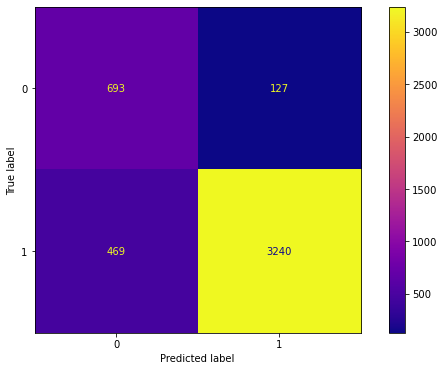

In [137]:
print("LogReg_Count Model")
print ("------------------")
eval(logreg_count, X_train_count, X_test_count)

In [138]:
import pickle

#with open('model.pickle', 'wb') as handle:
#    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [139]:
#Learningcurve 

In [140]:
import random
import pylab as pl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [141]:
# y_pred = logreg_count.predict(X_test_count)
# log_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
# log_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
# log_AP = viz.score_

In [142]:
#TF-IDF logitic

In [143]:
logreg_tfidf = LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced", random_state = 101)
logreg_tfidf.fit(X_train_tf_idf,y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [144]:
with open('salma_logreg_model.pickle', 'wb') as handle:
    pickle.dump(logreg_tfidf, handle, protocol=pickle.HIGHEST_PROTOCOL)

LogReg_TFIDF Model
------------------
[[ 703  117]
 [ 471 3238]]
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.86      0.71       820
           1       0.97      0.87      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.87      0.81      4529
weighted avg       0.90      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.64      0.92      0.75      3281
           1       0.98      0.88      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.81      0.90      0.84     18112
weighted avg       0.92      0.89      0.90     18112



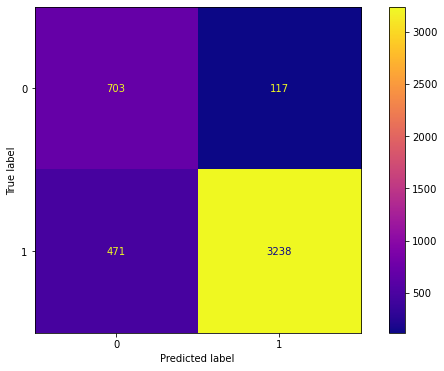

In [145]:
print("LogReg_TFIDF Model")
print("------------------")
eval(logreg_tfidf, X_train_tf_idf, X_test_tf_idf)

In [146]:
#with open("Kn_pickle.pkl", "wb") as file:
#    pickle.dump(pipe_final_Kn, file)

In [147]:
#import pickle

#with open("women_ml_salma.pkl", "wb") as file:
    #pickle.dump(logreg_tfidf, file)

### Naive Bayes

In [148]:
from sklearn.naive_bayes import MultinomialNB

In [149]:
MultiNB_tf_idf = MultinomialNB()
MultiNB_tf_idf.fit(X_train_tf_idf,y_train)

MultinomialNB()

In [150]:
with open('salma_nb_model.pickle', 'wb') as handle:
    pickle.dump(MultiNB_tf_idf, handle, protocol=pickle.HIGHEST_PROTOCOL)

Naive_Bayes_tf_idf - Model
------------------
[[ 135  685]
 [  20 3689]]
Test_Set
              precision    recall  f1-score   support

           0       0.87      0.16      0.28       820
           1       0.84      0.99      0.91      3709

    accuracy                           0.84      4529
   macro avg       0.86      0.58      0.59      4529
weighted avg       0.85      0.84      0.80      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.23      0.37      3281
           1       0.85      1.00      0.92     14831

    accuracy                           0.86     18112
   macro avg       0.90      0.61      0.65     18112
weighted avg       0.87      0.86      0.82     18112



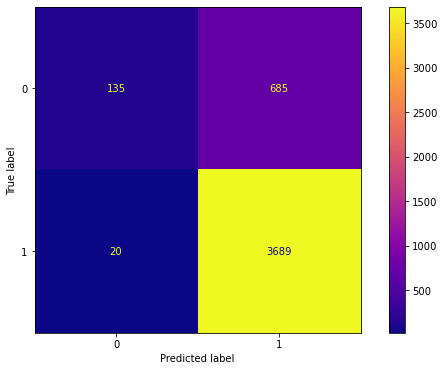

In [151]:
print("Naive_Bayes_tf_idf - Model")
print("------------------")
eval(MultiNB_tf_idf, X_train_tf_idf, X_test_tf_idf)

In [152]:
X_train

array(['beautiful sweater soft lovely color easy wear current photo true length pound ordered regular sm fit hip',
       'surprised low review dress dress obviously loose fitting style bit man quality fabric beautiful pattern stunning find loose flowy style comfortable love boot tights winter also planning wear sandal spring purchased petite small',
       'bought blue love usually wear x small retailer shirt small medium dress ended extra small petite really flattering hide stomach enough highly recommend dress size way',
       ...,
       'sweater came expected adorable others said soft comfy wear everywhere including work love',
       'top flattering im medium build bulky fabric didnt fall right place made look round im definitely going back',
       'top totally adorable one favorite retailer top season wear jean even red skinny pant get ton compliment fit true size material washable durable'],
      dtype=object)

In [153]:
def predict_recommendation(input_text):  # The function for doing all the previous steps
#     input_text = input_text.lower()
#     input_text = re.sub(r'[^a-zA-Z]', ' ', input_text)
#     input_text = word_tokenize(input_text)
#     input_text = stopwords_remove(input_text)
#     input_text = lemmatization(input_text)
#     input_text = ' '.join(input_text)
      #input_text = str(input_text)
#     input_text = tokenizer.texts_to_sequences([input_text])
#     input_text = pad_sequences(input_text, maxlen=maxlen, padding='pre')
    
    df_fct = pd.DataFrame(index=['0'], columns=['text'])
    
    df_fct.at["0", "test"] = input_text
    
    in_text = df_fct["text"].values
    
#     X_train_tf_idf = tf_idf_vectorizer.transform(input_text)
#     X_train_tf_idf.toarray()
#     input_text = logreg_countl.predict(input_text)
#     if input_text >= 0.5:
#         input_text = f'Recommended with %{round(float(input_text*100), 2)}'
#     else:
#         input_text = f'Not Recommended with %{round(float(input_text*100), 2)}'

    return in_text

In [154]:
predict_recommendation("blabla")

array([nan], dtype=object)

In [155]:
def predict(b):   
    df_app = pd.DataFrame(index=['0'], columns=['text'])
    df_app.at['0', 'text'] = b
    a = df_app['text'].values
    X_train_tf_idf = tf_idf_vectorizer.transform(a)
    X_train_tf_idf = X_train_tf_idf.toarray()
    pred = logreg_count.predict(X_train_tf_idf)
    if pred >= 0.5:
        affiche = f'Recommended with %{round(float(pred*100), 2)}'
    else:
        affiche = f'Not Recommended with %{round(float(pred*100), 2)}'
    return affiche

In [156]:
predict("blabla")

'Not Recommended with %0.0'

In [157]:
def predict(b):   
    df_app = pd.DataFrame(index=['0'], columns=['text'])
    df_app.at['0', 'text'] = b
    a = df_app['text'].values
    X_train_tf_idf = tf_idf_vectorizer.transform(a)
    X_train_tf_idf = X_train_tf_idf.toarray()
    pred = logreg_count.predict(X_train_tf_idf)
    if pred >= 0.5:
        affiche = "Bad"
    else:
        affiche = "Good"
    return affiche

In [158]:
predict("I'm so disapointed, the dress I bought is poor quality and was so expansive. I want a refound but it was impossible to go with it. I don't recommended this shop")

'Good'

In [159]:
predict("sexy dress")

'Bad'

In [160]:
predict("it rock")

'Bad'

In [161]:
predict("too small")

'Good'

In [162]:
predict("I ordered this dress in 0p since i am 5ft. it fits great its not too short just above the knee")

'Bad'

In [163]:
predict("")

'Good'

# Partie de code pas encore nettoyée 

In [164]:
# for x in reviews:
#     print(predict(x))   

In [165]:
for x in reviews:
    df_pred["Predicted_Feedbaack"] = predict(x)

NameError: name 'reviews' is not defined

In [ ]:
df_pred = pd.DataFrame(reviews)

In [ ]:
df_pred

In [ ]:
predict(df_pred.)

In [ ]:
review1 = "I ordered this dress in 0p since i am 5ft. it fits great its not too short just above the knee."
review2 = "Love the top design, not so much the fabric. i should've read the top was 100% polyester. returning and finding a better quality top."
review3 = "Love this henely, the lace-up is cute. the shirt is comfy. so versatile. beach coverup or over jeans"
review4 = "Loved this dress online, but my small pettie stature made me looks like an orphan from the prairie."
review5 = "I tried it in the store but was not the true size so i ordered online. i wore it only once so far and got lots of compliments. very unique design."
review6 = "Nice shirt seems well made. good just not a great fit for me."
review7 = "I tried on this dress in store and was amazed by the quality and simple structure of the dress. bought it with no hesitation."
review8 = "This top has a bit of a retro flare but so adorable on. looks really cute with a pair of faded boot cut jeans."
review9 = "Great quality top. i do wish it fit me...i'm really long waisted and this top was too short. had to return"
review10 = "A serious joke. i struggled with the buttons for a good 10 minutes and gave up after the 3rd button. i'm not sure what they were thinking."

reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10]

In [ ]:
df_pred["Predicted_Feedbaack"] = df_pred["Pred_Proba"].apply(lambda x: "Not Recommended" if x >= 0.5 else "Recommended")

In [ ]:


X_train_tf_idf = tf_idf_vectorizer.transform(input_text)


In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.remove('not')


def stopwords_remove(inputs):  # Ref.2
    return [k for k in inputs if k not in stop_words]


# df['text_stop'] = df['text_tokenized'].apply(stopwords_remove)
# df['text_stop'].head()

In [ ]:
lemmatizer = WordNetLemmatizer()


def lemmatization(inputs):  # Ref.1
    return [lemmatizer.lemmatize(word=kk, pos='v') for kk in inputs]

In [ ]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Support Vector Machine, Random Forest and Ada Boosting

In [ ]:
#CountVectorizer Cross Validation

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }
for i, j in custom_scorer.items():
    model = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = "balanced", random_state = 101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-0":
        log_count_rec = scores
    elif i == "f1-0":
        log_count_f1 = scores
    print(f" {i:20} score for LogReg_Count : {scores}\n")

In [ ]:
logreg_tfidf = LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced", random_state = 101)
logreg_tfidf.fit(X_train_tf_idf,y_train)

In [ ]:
print("LogReg_TFIDF Model")
print("------------------")
eval(logreg_tfidf, X_train_tf_idf, X_test_tf_idf)

In [ ]:
#TF-IDF Cross Validation

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }
for i, j in custom_scorer.items():
    LogisticRegression(C = 1, max_iter = 1000, random_state = 101, class_weight = "balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    print(f" {i:20} score for LogReg_TFIDF : {scores}\n")

### Support Vector Machine (SVM)

In [ ]:
#Countvectorizer

In [ ]:
from sklearn.svm import LinearSVC
svc_count = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)  
svc_count.fit(X_train_count,y_train)

In [ ]:
print("SVC_Count Model")
print("---------------")
eval(svc_count, X_train_count, X_test_count)

In [ ]:
#CountVectorizer With Cross Validation

In [ ]:
for i, j in custom_scorer.items():
    model = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_count_rec = scores
    elif i == "f1-1":
        svc_count_f1 = scores
    print(f" {i:20} score for SVC_Count : {scores}\n")

In [ ]:
#TD-IDF

In [ ]:
svc_tf_idf = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)  
svc_tf_idf.fit(X_train_tf_idf,y_train)

In [ ]:
print("SVC_TFIDF Model")
print("---------------")
eval(svc_tf_idf, X_train_tf_idf, X_test_tf_idf)

In [ ]:
#TFIDF With Cross Validation

In [ ]:
for i, j in custom_scorer.items():
    model = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_tfidf_rec = scores
    elif i == "f1-1":
        svc_tfidf_f1 = scores
    print(f" {i:20} score for SVC_TFIDF : {scores}\n")

### Random Forest

In [ ]:
#CountVectorizer

In [ ]:
X_train_count

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf_count = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
rf_count.fit(X_train_count, y_train)

In [ ]:
print("RF_Count Model")
print("--------------")
eval(rf_count, X_train_count, X_test_count)

In [ ]:
#CountVectorizer with Cross Validation

In [ ]:
for i, j in custom_scorer.items():
    model = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_count_rec = scores
    elif i == "f1-1":
        rf_count_f1 = scores
    print(f" {i:20} score for RF_Count : {scores}\n")

In [ ]:
#TF-IDF

In [ ]:
rf_tf_idf = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
rf_tf_idf.fit(X_train_tf_idf, y_train)

In [ ]:
print("RF_TFIDF Model")
print("--------------")
eval(rf_tf_idf, X_train_tf_idf, X_test_tf_idf)

In [ ]:
#TF-IDF with Cross Validation

In [ ]:

for i, j in custom_scorer.items():
    model = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_tfidf_rec = scores
    elif i == "f1-1":
        rf_tfidf_f1 = scores
    print(f" {i:20} score for RF_TFIDF : {scores}\n")

### Ada Boosting

In [ ]:
#CountVectorizer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_count = AdaBoostClassifier(n_estimators = 500, random_state = 101)
ada_count.fit(X_train_count, y_train)

In [ ]:
print("Ada_Count Model")
print("---------------")
eval(ada_count, X_train_count, X_test_count)

In [ ]:
#CountVectorizer with Cross Validation

In [ ]:
for i, j in custom_scorer.items():
    model = AdaBoostClassifier(n_estimators = 500, random_state = 101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_count_rec = scores
    elif i == "f1-1":
        ada_count_f1 = scores
    print(f" {i:20} score for Ada_Count : {scores}\n")

In [ ]:
#TF-IDF

In [ ]:
ada_tf_idf = AdaBoostClassifier(n_estimators = 500, random_state = 101)
ada_tf_idf.fit(X_train_tf_idf, y_train)

In [ ]:
print("Ada_TFIDF Model")
print("---------------")
eval(ada_tf_idf, X_train_tf_idf, X_test_tf_idf)

In [ ]:
#TF-IDF with Cross Validation

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }
for i, j in custom_scorer.items():
    model = AdaBoostClassifier(n_estimators = 500, random_state = 101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_tfidf_rec = scores
    elif i == "f1-1":
        ada_tfidf_f1 = scores
    print(f" {i:20} score for Ada_TFIDF : {scores}\n")

In [ ]:
#Comparaison

# Partie pas encore fini, tracer un diagramme en bar pour comparer les recall de chaque model 

In [ ]:
A = 2
B = 234
C = 10
D = 123

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes(Berno)_Count", "LogReg_Count", "SVM_Count", 
                                  "Random Forest_Count"],
                        "Recall_Score": [A, B, C, D],})

    
compare = compare.sort_values(by="Recall_Score", ascending=True)
fig = px.bar(compare, x = "Recall_Score", y = "Model", title = "Recall_Score")
fig.show()